In [1]:
import numpy as np
import nibabel as nib
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [2]:
image_path = '/Users/zhujiayuan/Downloads/Task04_Hippocampus/imagesTr/hippocampus_001.nii.gz'
image_obj = nib.load(image_path)
print(f'Type of the image {type(image_obj)}.')

Type of the image <class 'nibabel.nifti1.Nifti1Image'>.


In [3]:
# Turn into numpy array
#array = np.array(image.dataobj)
image_data = image_obj.get_fdata()
type(image_data)

numpy.ndarray

In [6]:
image_data.shape

(35, 51, 35)

In [7]:
# Get the image shape and print it out
height, width, depth= image_data.shape
print(f'The image object has the following dimensions:\nheight={height}\nwidth={width}\ndepth={depth}')

The image object has the following dimensions:
height=35
width=51
depth=35


### Visualize

Plotting layer Layer 17 of image


<function matplotlib.pyplot.show(close=None, block=None)>

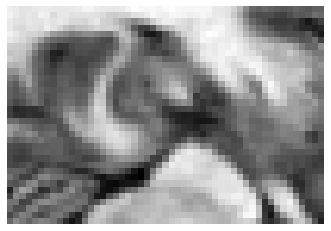

In [13]:
# Select random layer number
maxval = 35
i = np.random.randint(0, maxval)

print(f'Plotting layer Layer {i} of image')
plt.imshow(image_data[:, :, i], cmap = 'gray')
plt.axis('off')
plt.show

In [14]:
# define a function to visualize the data
def explore_3d_image(layer):
    plt.figure(figsize=(10,15))
    plt.imshow(image_data[:, :, layer], cmap = 'gray')
    plt.title('Explore Layers of Brain MRI', family = 'Arial', fontsize=20)
    plt.axis('off')
    return layer

# run the ipywidgets interact() function to explore data
interact(explore_3d_image, layer=(0,image_data.shape[2]-1))

interactive(children=(IntSlider(value=17, description='layer', max=34), Output()), _dom_classes=('widget-inter…

<function __main__.explore_3d_image(layer)>

In [18]:
label_path = '/Users/zhujiayuan/Downloads/Task04_Hippocampus/labelsTr/hippocampus_001.nii.gz'
label_obj = nib.load(label_path)
type(label_obj)

nibabel.nifti1.Nifti1Image

In [19]:
label_array = label_obj.get_fdata()
type(label_array)

numpy.ndarray

In [20]:
height,width,depth=label_array.shape
print(f'The label object has the following dimensions:\nheight={height}\nwidth={width}\ndepth={depth}')

The label object has the following dimensions:
height=35
width=51
depth=35


In [26]:
print(f'With the unique values: {np.unique(label_array)}')

print('''\nCorresponding to the following label categories
0: background,
1: Anterior,
2: Posterior
''')

With the unique values: [0. 1. 2.]

Corresponding to the following label categories
0: background,
1: Anterior,
2: Posterior



### visualize the data for specific labels

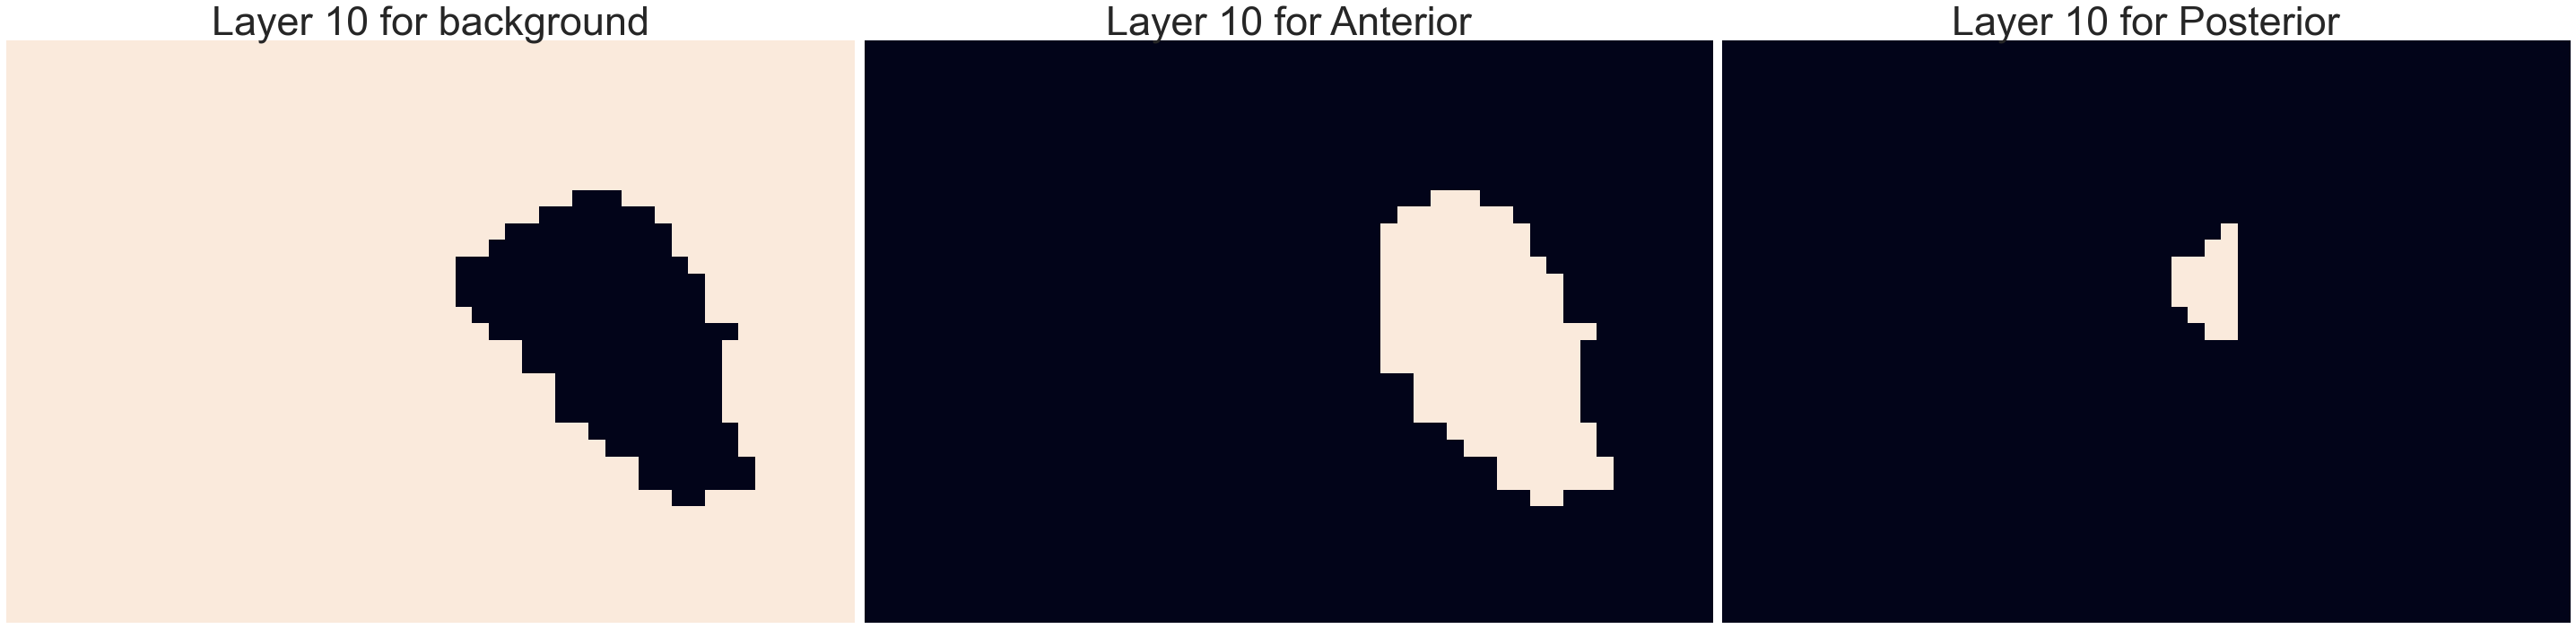

In [73]:
# define a single layer for plotting
layer = 10

# define a dictionary of class labels
classes_dict = {
    'background': 0,
    'Anterior':1,
    'Posterior': 2
}

# set up for plotting
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(40,25))
for i in range(3):
    img_label_str = list(classes_dict.keys())[i]
    img = label_array[:, :, layer]
    mask = np.where(img==classes_dict[img_label_str], 255, 0)
    ax[i].imshow(mask)
    ax[i].set_title(f'Layer {layer} for {img_label_str}', fontsize=45, family = 'Arial')
    ax[i].axis('off')
plt.tight_layout()

### interactive visualization across layers

In [78]:
# create button values
select_class = ToggleButtons(
    options = ['background', 'Anterior', 'Posterior'],
    description = 'Select class',
    disabled = False,
    button_style = 'info'
)

# create layer slider
select_layer = IntSlider(min=0, max = 34, description = 'Select layer', continuous_update = False)

# define a function for plotting images
def plot_image(seg_class, layer):
    print(f'Plotting {layer} Layer, Label: {seg_class}')
    img_label = classes_dict[seg_class]
    mask = np.where(label_array[:, :, layer]==img_label, 255, 0)
    plt.figure(figsize=(6,9))
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    
# use the interactive() tool to create a visualization
interactive(plot_image, seg_class = select_class, layer = select_layer)


interactive(children=(ToggleButtons(button_style='info', description='Select class', options=('background', 'A…

## import data

In [257]:
import glob
import torchio as tio
from torchvision import transforms 
from torch.utils.data import DataLoader

In [258]:
images = glob.glob('/Users/zhujiayuan/Downloads/Task04_Hippocampus/imagesTr' + "/*.nii.gz")
labels = glob.glob('/Users/zhujiayuan/Downloads/Task04_Hippocampus/labelsTr' + "/*.nii.gz")

In [275]:
nib.load(images[0]).get_fdata().shape

(36, 57, 37)

### find size distribution

In [291]:
width_list_images = []
height_list_images = []
depth_list_images = []
width_list_labels = []
height_list_labels = []
depth_list_labels = []

flattern_data = np.array([])

for i in range(len(images)):
    image = nib.load(images[i]).get_fdata().shape
    label = nib.load(labels[i]).get_fdata().shape
    
    width_list_images.append(image[0])
    height_list_images.append(image[1])
    depth_list_images.append(image[2])
    
    width_list_labels.append(label[0])
    height_list_labels.append(label[1])
    depth_list_labels.append(label[2])
    
    flattern_data = np.append(flattern_data, nib.load(images[i]).get_fdata().flatten())

In [292]:
resize_shape = (max(width_list_images), max(height_list_images), max(depth_list_images))
resize_shape

(43, 59, 47)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30'),
  Text(0, 35.0, '35')])

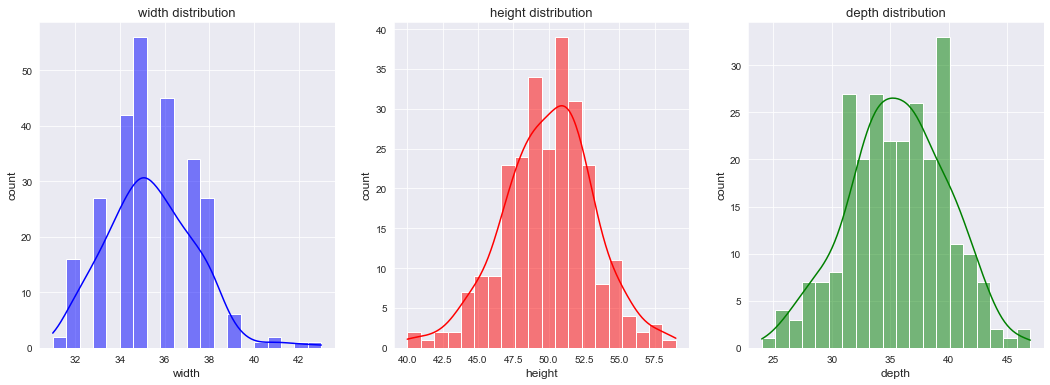

In [293]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(18,6))

plt.subplot(1,3,1)
# training set
fig = sns.histplot(width_list_images, color = 'b', kde = True, bins = 20) 

plt.title('width distribution', fontsize = 13)
plt.xlabel('width', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(1,3,2)
fig = sns.histplot(height_list_images, color = 'r', kde = True, bins = 20) 

plt.title('height distribution', fontsize = 13)
plt.xlabel('height', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(1,3,3)
fig = sns.histplot(depth_list_images, color = 'g', kde = True, bins = 20) 

plt.title('depth distribution', fontsize = 13)
plt.xlabel('depth', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

### find data distribution

(array([0.0e+00, 2.0e+07, 4.0e+07, 6.0e+07, 8.0e+07, 1.0e+08, 1.2e+08,
        1.4e+08, 1.6e+08, 1.8e+08]),
 [Text(0, 0.0, '0.0'),
  Text(0, 20000000.0, '0.2'),
  Text(0, 40000000.0, '0.4'),
  Text(0, 60000000.0, '0.6'),
  Text(0, 80000000.0, '0.8'),
  Text(0, 100000000.0, '1.0'),
  Text(0, 120000000.0, '1.2'),
  Text(0, 140000000.0, '1.4'),
  Text(0, 160000000.0, '1.6'),
  Text(0, 180000000.0, '1.8')])

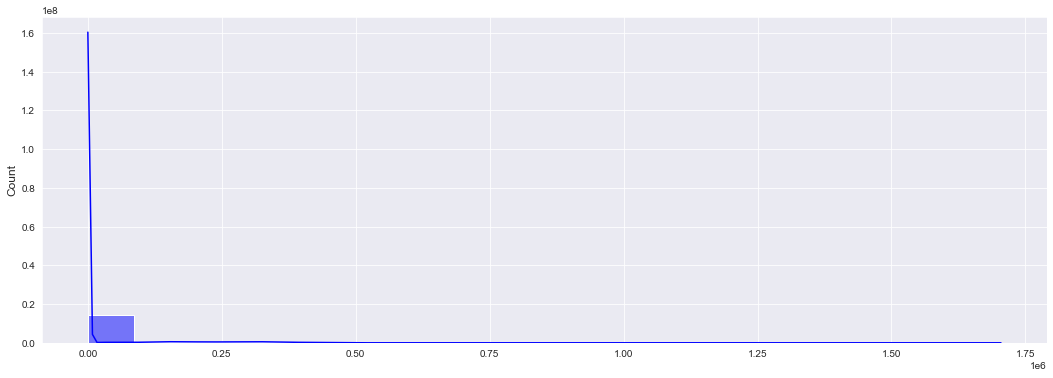

In [295]:
plt.figure(figsize=(18,6))

fig = sns.histplot(flattern_data, color = 'b', kde = True, bins = 20) 

plt.title('', fontsize = 13)
plt.xlabel('', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

In [296]:
min(flattern_data)

0.0

In [297]:
max(flattern_data)

1704295.25

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000'),
  Text(0, 7000.0, '7000')])

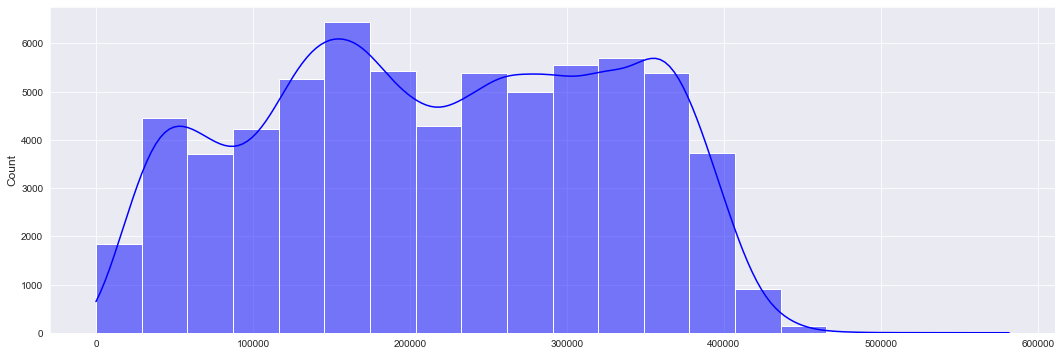

In [303]:
a = nib.load(images[2]).get_fdata().flatten()

plt.figure(figsize=(18,6))

fig = sns.histplot(a, color = 'b', kde = True, bins = 20) 

plt.title('', fontsize = 13)
plt.xlabel('', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

In [300]:
outlier = []
for i in range(len(images)):
    image = nib.load(images[i]).get_fdata().flatten()
    if max(image) > 250000:
        outlier.append(i)
    

In [301]:
len(outlier)

33

### resize image with tio.CropOrPad

In [366]:
import torch
import os

In [368]:
# Load data and include prepared transform (Remember to apply same transform to both image and label) 
class mySegmentationData(object):
    def __init__(self, root, resize_shape, transforms = None):
        self.root = root
        self._eval = eval
        self.resize_shape = resize_shape
        self.transforms = transforms
        self.build_dataset()
                      
    def build_dataset(self):
        image_path = os.path.join(self.root, 'imagesTr')
        label_path = os.path.join(self.root, 'labelsTr')
        self._images = glob.glob(image_path + '/*.nii.gz')
        self._labels = glob.glob(label_path + '/*.nii.gz')
    
    def __getitem__(self, idx):
        image = tio.ScalarImage(self._images[idx])
        label = tio.ScalarImage(self._labels[idx])
        
        # normalization
        transform = tio.transforms.ZNormalization()
        image = transform(image)
        
        # resize
        transform = tio.CropOrPad(self.resize_shape)
        image = transform(image).data
        label = transform(image).data
        
        if self.transforms is not None:
            image = self.transforms(image)
            label = self.transforms(label)
   
        return image, label
    
    def __len__(self):
        return len(self._images)

In [374]:
dataset = mySegmentationData('/Users/zhujiayuan/Downloads/Task04_Hippocampus/', resize_shape)

In [387]:
# split data
from torch.utils.data.sampler import SubsetRandomSampler

num_sample = len(dataset)
index = np.arange(0, num_sample)

num_valid = int(np.floor(0.1 * num_train))
num_test = int(np.floor(0.1 * num_train))


valid_idx = np.random.choice(index, num_valid)
index = index[~np.isin(index, valid_idx)]
test_idx = np.random.choice(index, num_test)
index = index[~np.isin(index, test_idx)]


train_sampler = SubsetRandomSampler(index)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(test_idx)


print(len(train_sampler))
print(len(valid_sampler))
print(len(test_sampler))

# Now create data loaders (same as before)
# Now we need to create dataLoaders that will allow to iterate during training
batch_size = 4 # create batch-based on how much memory you have and your data size

traindataloader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler, num_workers=0)
valdataloader = DataLoader(dataset, batch_size=batch_size, sampler=valid_sampler,
            num_workers=0)
testloader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler,
            num_workers=0)



211
26
26


In [388]:
print('Number of training samples:', len(traindataloader))
print('Number of validation samples:', len(valdataloader))
print('Number of testing samples:', len(testloader))

Number of training samples: 53
Number of validation samples: 7
Number of testing samples: 7


In [389]:
# always check the shape of your training data
dataiter = iter(traindataloader)
images, masks = next(dataiter)
images.shape

torch.Size([4, 1, 43, 59, 47])

In [392]:
images[0,0,10,:,:]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

Plotting layer Layer 10 of image


<function matplotlib.pyplot.show(close=None, block=None)>

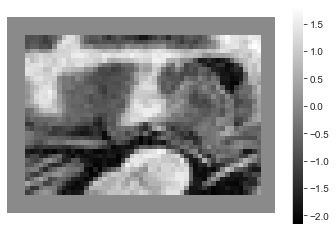

In [394]:
i = 10
print(f'Plotting layer Layer {i} of image')
plt.imshow(images[3, 0, :, :, 15], cmap = 'gray')
plt.axis('off')
plt.colorbar()
plt.show

Plotting layer Layer 10 of image


<function matplotlib.pyplot.show(close=None, block=None)>

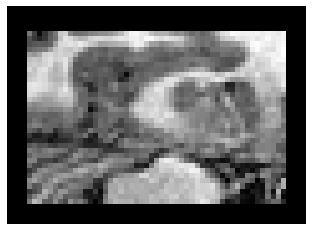

In [254]:
i = 10
print(f'Plotting layer Layer {i} of image')
plt.imshow(images[3, 0, :, :, 15], cmap = 'gray')
plt.axis('off')
plt.show